In [4]:
import numpy as np

In [5]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [7]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [13]:
def calc_error(x,y,w,b):
    error =0
    for i in range(len(x)):
        error = error + ((np.dot(x[i],w)+b)-y[i])**2
    return error/(len(x)*2)
        
        

In [14]:
calc_error(X_train,y_train,w_init,b_init)

1.5578904045996674e-12

In [39]:
def compute_gradient(x,y,w,b):
    m = len(w)
    n = len(x)
    d_dw = np.zeros(m)
    d_db = 0
    for i in range(n):
        error = (((np.dot(x[i],w)+b)-y[i]))
        for j in range(m):
            d_dw[j] = d_dw[j] + (error*x[i,j])
        d_db = d_db + error
    d_dw = d_dw/n
    d_db = d_db/n
    return d_dw,d_db
        

In [40]:
compute_gradient(X_train,y_train,w_init,b_init)

(array([-2.72623574e-03, -6.27197255e-06, -2.21745574e-06, -6.92403377e-05]),
 -1.6739251122999121e-06)

In [55]:
def new_weight(x,y,wei,b,epoch,lr):
    m,n = x.shape
    history = []
    
    for i in range(epoch):
        d_dw,d_db = compute_gradient(x,y,wei,b)
        for j in range(n):
            wei[j] = wei[j] - (lr*d_dw[j])
            b = b - (lr*d_db)
        cost = calc_error(x,y,wei,b)
        history.append(cost)
        print(i,f"Weight:{wei},bias = {b}",f"Cost: {cost}")
    return history
        
        

In [84]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
history = new_weight(X_train,y_train,initial_w,initial_b,1000,3.0e-9)


0 Weight:[1.448008e-03 3.352000e-06 1.102000e-06 3.621000e-05],bias = 3.48e-06 Cost: 48821.15325123254
1 Weight:[2.88564485e-03 6.68013321e-06 2.19561307e-06 7.21575302e-05],bias = 6.9346596618239995e-06 Cost: 48134.25296230615
2 Weight:[4.31298482e-03 9.98457057e-06 3.28089929e-06 1.07844471e-04],bias = 1.0364160483570546e-05 Cost: 47457.15716215931
3 Weight:[5.73010168e-03 1.32654818e-05 4.35791828e-06 1.43272688e-04],bias = 1.3768682663373751e-05 Cost: 46789.72590615828
4 Weight:[7.13706864e-03 1.65230354e-05 5.42672928e-06 1.78444034e-04],bias = 1.7148405108714182e-05 Cost: 46131.821247172775
5 Weight:[8.53395840e-03 1.97573987e-05 6.48739106e-06 2.13360350e-04],bias = 2.0503505445663053e-05 Cost: 45483.30720706461
6 Weight:[9.92084314e-03 2.29687377e-05 7.53996199e-06 2.48023463e-04],bias = 2.3834160028060193e-05 Cost: 44844.04974858318
7 Weight:[1.12977945e-02 2.61572175e-05 8.58450003e-06 2.82435185e-04],bias = 2.714054394662632e-05 Cost: 44213.9167476622
8 Weight:[1.26648837e-0

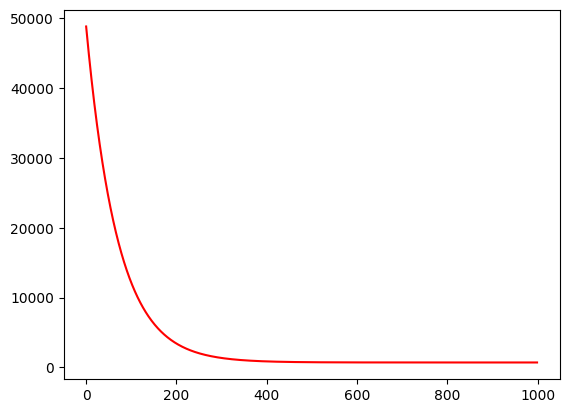

In [85]:
import matplotlib.pyplot as plt
plt.plot(history,c='r')
plt.show()